In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install opendatasets -q
import opendatasets as od
od.download('https://physionet.org/static/published-projects/ecg-arrhythmia/a-large-scale-12-lead-electrocardiogram-database-for-arrhythmia-study-1.0.0.zip')

2498715648it [1:15:19, 552890.85it/s]                                


In [ ]:
!unzip "/content/a-large-scale-12-lead-electrocardiogram-database-for-arrhythmia-study-1.0.0.zip" -d "/content/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/a-large-scale-12-lead-electrocardiogram-database-for-arrhythmia-study-1.0.0/WFDBRecords/43/436/JS43065.hea  
  inflating: /content/a-large-scale-12-lead-electrocardiogram-database-for-arrhythmia-study-1.0.0/WFDBRecords/43/436/JS43065.mat  
  inflating: /content/a-large-scale-12-lead-electrocardiogram-database-for-arrhythmia-study-1.0.0/WFDBRecords/43/436/JS43066.hea  
  inflating: /content/a-large-scale-12-lead-electrocardiogram-database-for-arrhythmia-study-1.0.0/WFDBRecords/43/436/JS43066.mat  
  inflating: /content/a-large-scale-12-lead-electrocardiogram-database-for-arrhythmia-study-1.0.0/WFDBRecords/43/436/JS43067.hea  
  inflating: /content/a-large-scale-12-lead-electrocardiogram-database-for-arrhythmia-study-1.0.0/WFDBRecords/43/436/JS43067.mat  
  inflating: /content/a-large-scale-12-lead-electrocardiogram-database-for-arrhythmia-study-1.0.0/WFDBRecords/43/436/JS43068.hea  
  inflating: /content/a-large-sc

In [ ]:
import numpy as np
import scipy.io
from matplotlib import mlab
import matplotlib.pyplot as plt
import os
import pandas as pd

In [ ]:
npfile = []
x = np.zeros((2, 1))
for k in range(0,5,1):
    for j in range(0,10,1):
        if k == 4 and j == 7:
            break
        if k == 0 and j == 0:
            continue
        for i in range(0,10,1):
            if k == 4 and j == 6 and (i != 0 and i != 1):
                break
            path = f"//content//a-large-scale-12-lead-electrocardiogram-database-for-arrhythmia-study-1.0.0//WFDBRecords//{k}{j}//{k}{j}{i}//"
            for filename in os.listdir(path):
                if filename.endswith('.mat'):
                    # print(os.path.join(path,filename))
                    m=scipy.io.loadmat(os.path.join(path,filename), struct_as_record=False) # load data from matlab file
                    npfile.append(m['val'])

In [ ]:
len(npfile)

45152

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/data_labels4.csv', index_col=None)
# df = df.drop('Unnamed: 0', axis=1)
df = df.drop('file_name', axis=1)
df = df.drop('norm', axis=1)
df

,SB,SR,AF,ST,TWC,LVH,STC,TWO,SA,AFIB,STDD,ALS
0,0,0,0,0,1,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45147,0,0,0,0,0,0,0,0,0,0,0,0
45148,0,0,0,0,0,0,0,0,0,0,0,0
45149,0,0,0,0,0,0,0,0,0,0,0,0
45150,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
zero_rows = df.index[df.eq(0).all(axis=1)].tolist()
zero_rows

[9508,
 9509,
 9511,
 9512,
 9513,
 9515,
 9516,
 9517,
 9518,
 9519,
 9521,
 9523,
 9526,
 9527,
 9529,
 9531,
 9532,
 9534,
 9535,
 9538,
 9539,
 9540,
 9541,
 9542,
 9543,
 9544,
 9545,
 9546,
 9547,
 9548,
 9549,
 9550,
 9551,
 9553,
 9554,
 9555,
 9556,
 9558,
 9559,
 9560,
 9562,
 9563,
 9565,
 9566,
 9567,
 9569,
 9570,
 9571,
 9572,
 9573,
 9574,
 9575,
 9576,
 9579,
 9580,
 9581,
 9582,
 9587,
 9588,
 9589,
 9592,
 9593,
 9594,
 9595,
 9596,
 9598,
 9599,
 9600,
 9601,
 9603,
 9604,
 9605,
 9606,
 9609,
 9610,
 9611,
 9612,
 9615,
 9617,
 9618,
 9619,
 9621,
 9622,
 9626,
 9627,
 9628,
 9629,
 9631,
 9632,
 9633,
 9634,
 9635,
 9636,
 9637,
 9638,
 9639,
 9640,
 9641,
 9642,
 9643,
 9644,
 9645,
 9646,
 9647,
 9648,
 9654,
 9655,
 9656,
 9659,
 9661,
 9662,
 9663,
 9664,
 9665,
 9666,
 9667,
 9668,
 9670,
 9671,
 9672,
 9674,
 9675,
 9676,
 9679,
 9680,
 9682,
 9683,
 9684,
 9686,
 9687,
 9688,
 9690,
 9691,
 9692,
 9693,
 9694,
 9695,
 9696,
 9698,
 9699,
 9700,
 9701,
 9702,

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/data_labels4.csv', index_col=None)
df = df.drop('norm', axis=1)
df = df.drop(zero_rows)
df

,file_name,SB,SR,AF,ST,TWC,LVH,STC,TWO,SA,AFIB,STDD,ALS
0,JS00001.hea,0,0,0,0,1,0,0,0,0,1,0,0
1,JS00002.hea,1,0,0,0,1,0,0,0,0,0,0,0
2,JS00004.hea,1,0,0,0,0,0,0,0,0,0,0,0
3,JS00005.hea,0,0,1,0,0,0,0,0,0,0,1,0
4,JS00006.hea,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45108,JS45508.hea,0,0,0,0,0,0,1,0,0,0,0,0
45112,JS45512.hea,0,0,0,0,0,0,1,0,0,0,0,0
45114,JS45514.hea,0,0,0,0,0,0,1,0,0,0,0,0
45140,JS45540.hea,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.to_csv('/content/drive/MyDrive/Data/data_labels5.csv', index=False)

In [ ]:
npfile = [npfile[i] for i in range(len(npfile)) if i not in zero_rows]

In [ ]:
len(npfile)

43777

In [ ]:
df = df.drop(zero_rows)

In [ ]:
df.sum()

SB      16559
SR       8125
AF       8060
ST       7255
TWC      7043
LVH      5401
STC      4232
TWO      2877
SA       2550
AFIB     1780
STDD     1668
ALS      1545
dtype: int64

============================================================

In [ ]:
y_all = df.values

In [ ]:
b = npfile[38500:] ####
y = y_all[38500:] ####

In [ ]:
x = np.array(b)

In [ ]:
x.shape

(5277, 12, 5000)

In [ ]:
y.shape

(5277, 12)

In [ ]:
import random

random_indices = random.sample(range(5277), 250)

In [ ]:
X_val = x[random_indices]
y_val = y[random_indices]

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=42)

In [ ]:
np.save('/content/drive/MyDrive/batchs/X_train8.npy',x) ###
np.save('/content/drive/MyDrive/batchs/X_val8.npy',X_val) ####
np.save('/content/drive/MyDrive/batchs/y_train8.npy',y) ####
np.save('/content/drive/MyDrive/batchs/y_val8.npy',y_val) ###

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/data_labels2.csv', index_col=None)

In [ ]:
df

,Unnamed: 0,file_name,AFIB,RBBB,TWC,SB,AF,STDD,STTC,SR,...,SPB,ILBBB,EAT,LPFBE,JT,BS,AJR,SPRI,LAH,LAE
0,0,JS00001.hea,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,JS00002.hea,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,JS00004.hea,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,JS00005.hea,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,JS00006.hea,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45147,45147,JS45547.hea,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45148,45148,JS45548.hea,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45149,45149,JS45549.hea,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45150,45150,JS45550.hea,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df

,file_name,AFIB,RBBB,TWC,SB,AF,STDD,STTC,SR,LVH,...,SPB,ILBBB,EAT,LPFBE,JT,BS,AJR,SPRI,LAH,LAE
0,JS00001.hea,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,JS00002.hea,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,JS00004.hea,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,JS00005.hea,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,JS00006.hea,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45147,JS45547.hea,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45148,JS45548.hea,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45149,JS45549.hea,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45150,JS45550.hea,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1 = df[36000:].copy()
df1 = df1.drop('file_name', axis=1)

In [ ]:
df1

,AFIB,RBBB,TWC,SB,AF,STDD,STTC,SR,LVH,ST,...,SPB,ILBBB,EAT,LPFBE,JT,BS,AJR,SPRI,LAH,LAE
36000,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
36001,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
36002,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
36003,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
36004,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y1 = df1.values
np.save('/content/drive/MyDrive/Data/y5.npy', y1)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/data_labels2.csv', index_col=None)
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('file_name', axis=1)
df

,AFIB,RBBB,TWC,SB,AF,STDD,STTC,SR,LVH,ST,...,SPB,ILBBB,EAT,LPFBE,JT,BS,AJR,SPRI,LAH,LAE
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.sum()

AFIB     1780
RBBB      649
TWC      7043
SB      16559
AF       8060
        ...  
BS          5
AJR        12
SPRI       23
LAH         8
LAE         1
Length: 94, dtype: int64

In [ ]:
df.sum().sort_values(ascending=True)[-12:].index

Index(['SB', 'SR', 'AF', 'ST', 'TWC', 'LVH', 'STC', 'TWO', 'SA', 'AFIB',
       'STDD', 'ALS'],
      dtype='object')

<BarContainer object of 12 artists>

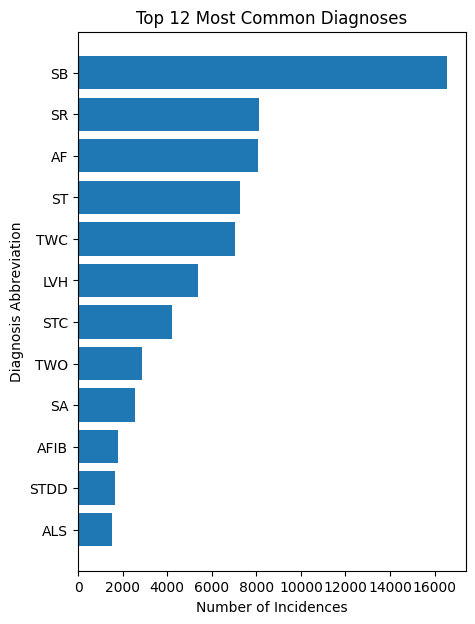

In [ ]:
# Plot the top 20 most-coded diagnostic codes.
fig,ax=plt.subplots()
fig.set_size_inches(5, 7)
ax.set_title('Top 12 Most Common Diagnoses')
ax.set_xlabel('Number of Incidences')
ax.set_ylabel('Diagnosis Abbreviation')
ax.barh(y=df.sum().sort_values(ascending=True)[-12:].index,width=df.sum().sort_values(ascending=True)[-12:].values)

In [ ]:
df = df.filter(['SB', 'SR', 'AF', 'ST', 'TWC', 'LVH', 'STC', 'TWO', 'SA', 'AFIB','STDD', 'ALS'])

In [ ]:
df

,SB,SR,AF,ST,TWC,LVH,STC,TWO,SA,AFIB,STDD,ALS
0,0,0,0,0,1,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45147,0,0,0,0,0,0,0,0,0,0,0,0
45148,0,0,0,0,0,0,0,0,0,0,0,0
45149,0,0,0,0,0,0,0,0,0,0,0,0
45150,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['norm'] = df.apply(lambda x: 1 if (x == 0).all() else 0, axis=1)

In [ ]:
df

,SB,SR,AF,ST,TWC,LVH,STC,TWO,SA,AFIB,STDD,ALS,norm
0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45147,0,0,0,0,0,0,0,0,0,0,0,0,1
45148,0,0,0,0,0,0,0,0,0,0,0,0,1
45149,0,0,0,0,0,0,0,0,0,0,0,0,1
45150,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Data/data_labels2.csv', index_col=None)
df2 = df2.drop('Unnamed: 0', axis=1)
df2

,file_name,AFIB,RBBB,TWC,SB,AF,STDD,STTC,SR,LVH,...,SPB,ILBBB,EAT,LPFBE,JT,BS,AJR,SPRI,LAH,LAE
0,JS00001.hea,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,JS00002.hea,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,JS00004.hea,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,JS00005.hea,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,JS00006.hea,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45147,JS45547.hea,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45148,JS45548.hea,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45149,JS45549.hea,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45150,JS45550.hea,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['file_name'] =df2['file_name']

In [ ]:
df

,SB,SR,AF,ST,TWC,LVH,STC,TWO,SA,AFIB,STDD,ALS,norm,file_name
0,0,0,0,0,1,0,0,0,0,1,0,0,0,JS00001.hea
1,1,0,0,0,1,0,0,0,0,0,0,0,0,JS00002.hea
2,1,0,0,0,0,0,0,0,0,0,0,0,0,JS00004.hea
3,0,0,1,0,0,0,0,0,0,0,1,0,0,JS00005.hea
4,1,0,0,0,0,0,0,0,0,0,0,0,0,JS00006.hea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45147,0,0,0,0,0,0,0,0,0,0,0,0,1,JS45547.hea
45148,0,0,0,0,0,0,0,0,0,0,0,0,1,JS45548.hea
45149,0,0,0,0,0,0,0,0,0,0,0,0,1,JS45549.hea
45150,0,0,0,0,0,0,0,0,0,0,0,0,1,JS45550.hea


In [ ]:
df.insert(0, 'file_name_', df['file_name'])
df = df.drop('file_name', axis=1)

In [ ]:
df = df.rename(columns={'file_name_': 'file_name'})
df.head(1)

,file_name,SB,SR,AF,ST,TWC,LVH,STC,TWO,SA,AFIB,STDD,ALS,norm
0,JS00001.hea,0,0,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
df.drop('file_name', axis=1).sum().sort_values(ascending=False)

SB      16559
SR       8125
AF       8060
ST       7255
TWC      7043
LVH      5401
STC      4232
TWO      2877
SA       2550
AFIB     1780
STDD     1668
ALS      1545
norm     1375
dtype: int64

In [ ]:
df.to_csv('/content/drive/MyDrive/Data/data_labels4.csv', index=False)

In [ ]:
arr = df.drop('file_name', axis=1).values

In [ ]:
arr

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
np.save('/content/drive/MyDrive/Data/labels4',arr)